<a href="https://colab.research.google.com/github/neihtfool/Convolutional-Networks/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
import os
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data from Kaggle: Dogs vs Cats



In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [83]:
ls {PATH}

train/  validation/  vectorize.py


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [85]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_train)
print('total training dog images:', num_dogs_train)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print('total training images:', total_train)
print('total validateion images:', total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total training images: 2000
total validateion images: 1000


In [0]:
BATCH_SIZE = 128
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Prepare Data

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [88]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [89]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plot_img(img_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip (img_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

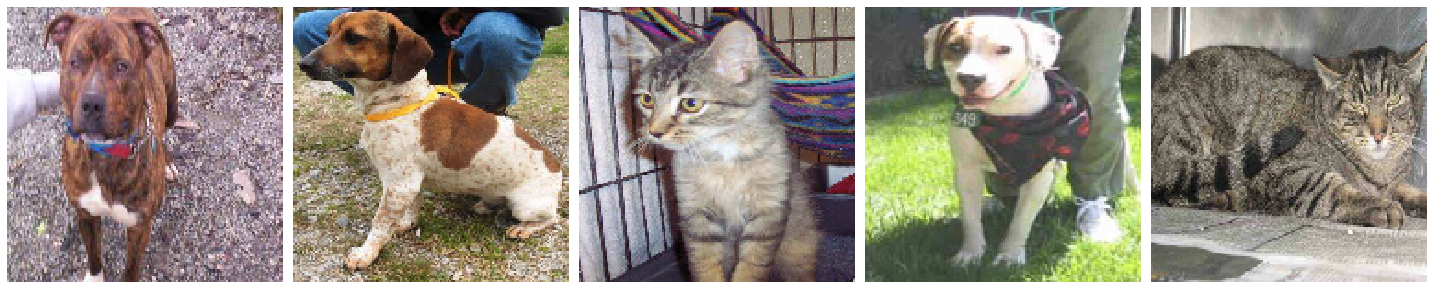

In [92]:
plot_img(sample_training_images[:5])

# Create model

Convolution block := -> convolutional layer -> max pool layer ->

MLP/Fully connected layers := -> hidden layer -> output layer

The architecture:

input -> convolution block -> convolution block -> convolution block -> MLP

In [0]:
model = Sequential([
                    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)])

# Train model

In [94]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

# Training results

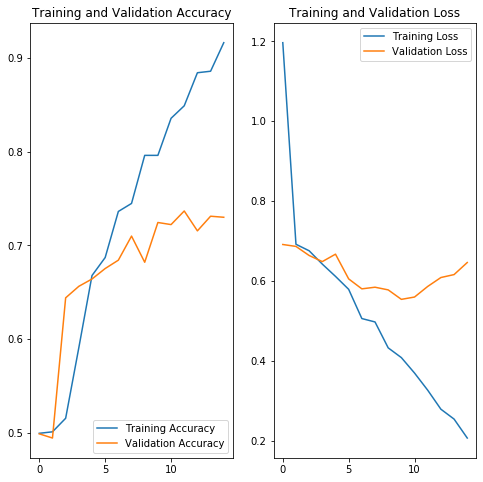

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The gap between training and validation in both accuracy and loss is really wide which means that the model overfits.

# Overfitting

# Data Augmentation

## Horizontal Flip

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [98]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

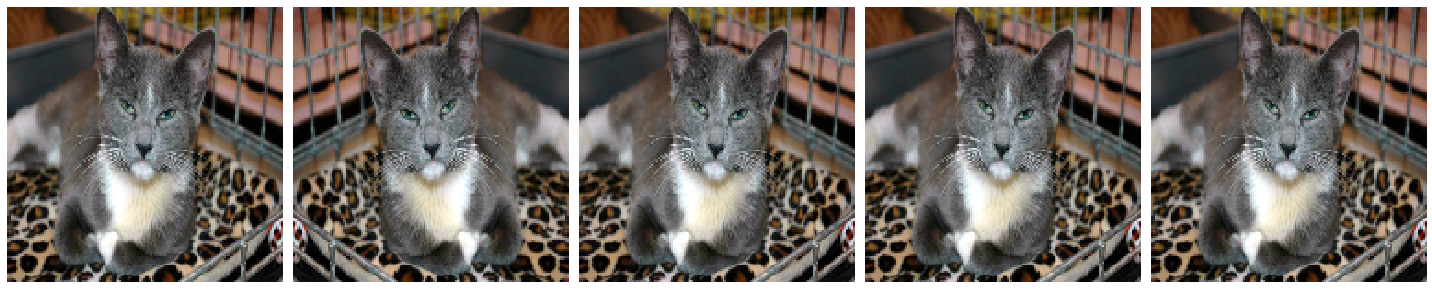

In [100]:
plot_img(augmented_images)

## Random Rotation

In [101]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


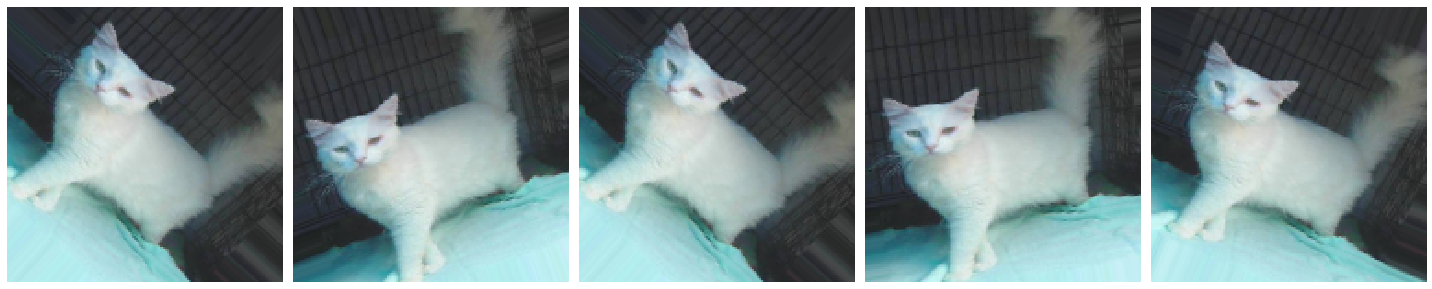

In [102]:
plot_img(augmented_images)

## Zoom

In [103]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


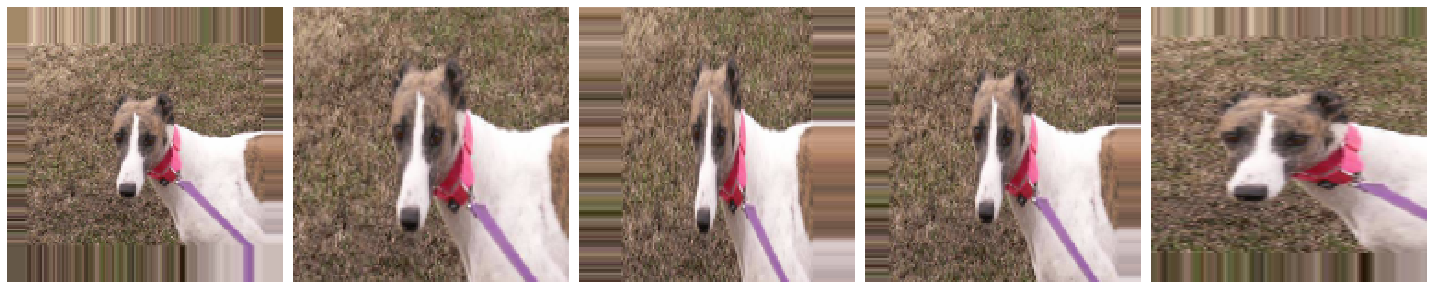

In [104]:
plot_img(augmented_images)

## Combine them

In [0]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [106]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


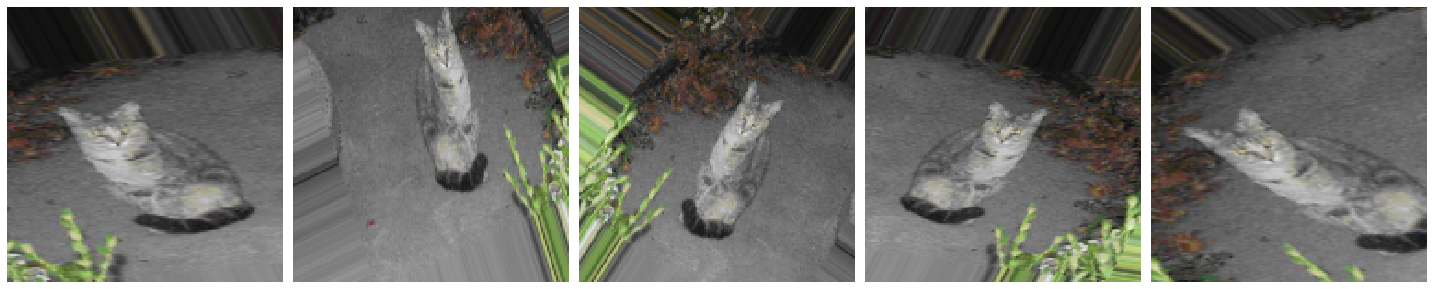

In [107]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_img(augmented_images)

## Augmentation for Validation Set

In [108]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Dropout

In [0]:
model_new = Sequential([
                        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Conv2D(32, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Conv2D(64, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(1)
])

# Train the new model

In [110]:
model_new.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)       

In [111]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)

Epoch 1/15
15/15 [==============================] - 65s 4s/step - loss: 1.1225 - accuracy: 0.4911 - val_loss: 0.6904 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 64s 4s/step - loss: 0.6935 - accuracy: 0.5053 - val_loss: 0.6917 - val_accuracy: 0.4989
Epoch 3/15
15/15 [==============================] - 64s 4s/step - loss: 0.6919 - accuracy: 0.4963 - val_loss: 0.6874 - val_accuracy: 0.5033
Epoch 4/15
15/15 [==============================] - 63s 4s/step - loss: 0.6887 - accuracy: 0.5139 - val_loss: 0.6909 - val_accuracy: 0.4922
Epoch 5/15
15/15 [==============================] - 63s 4s/step - loss: 0.6829 - accuracy: 0.4973 - val_loss: 0.6548 - val_accuracy: 0.5491
Epoch 6/15
15/15 [==============================] - 63s 4s/step - loss: 0.6637 - accuracy: 0.5470 - val_loss: 0.6628 - val_accuracy: 0.5580
Epoch 7/15
15/15 [==============================] - 64s 4s/step - loss: 0.6769 - accuracy: 0.5374 - val_loss: 0.6690 - val_accuracy: 0.5335
Epoch 8/15
15/15 [==

Text(0.5, 1.0, 'Training and Validation Loss')

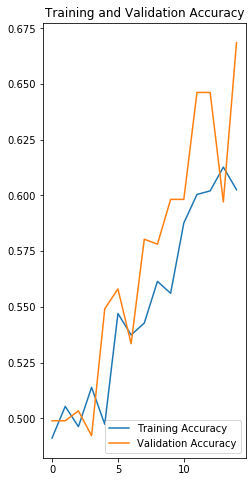

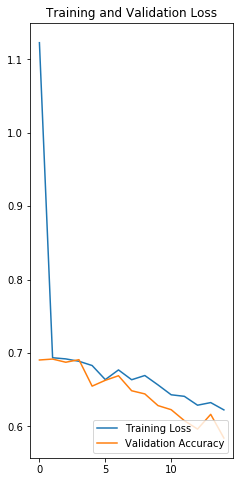

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

The gap is much narrower now -> Overfitting prevented